In [67]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [25]:
import nltk
import pickle
from nltk.corpus import stopwords
import re
import string
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\이도형\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\이도형\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\이도형\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\이도형\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\이도형\AppData\Roaming\nltk_data...
[nltk_data]    |   Package 

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\이도형\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\이도형\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\이도형\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\이도형\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\이도형\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat to
[nltk_

[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package wordnet to
[nltk_data]    |     C:\Users\이도형\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet is already up-to-date!
[nltk_data]    | Downloading package wordnet2021 to
[nltk_data]    |     C:\Users\이도형\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet2021 is already up-to-date!
[nltk_data]    | Downloading package wordnet2022 to
[nltk_data]    |     C:\Users\이도형\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet2022 is already up-to-date!
[nltk_data]    | Downloading package wordnet31 to
[nltk_data]    |     C:\Users\이도형\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet31 is already up-to-date!
[nltk_data]    | Downloading package wordnet_ic to
[nltk_data]    |     C:\Users\이도형\AppData\Roaming\nltk_data...
[nltk_data]    |   Package wordnet_ic is already up-to-date!
[nltk_data]    | Downloading package words to
[nltk_data]    | 

True

In [3]:
facts_strings = train['facts'].astype(str).tolist()

In [7]:
facts_strings

['On June 27, 1962, Phil St. Amant, a candidate for public office, made a television speech in Baton Rouge, Louisiana.  During this speech, St. Amant accused his political opponent of being a Communist and of being involved in criminal activities with the head of the local Teamsters Union.  Finally, St. Amant implicated Herman Thompson, an East Baton Rouge deputy sheriff, in a scheme to move money between the Teamsters Union and St. Amant’s political opponent. \nThompson successfully sued St. Amant for defamation.  Louisiana’s First Circuit Court of Appeals reversed, holding that Thompson did not show St. Amant acted with “malice.”  Thompson then appealed to the Supreme Court of Louisiana.  That court held that, although public figures forfeit some of their First Amendment protection from defamation, St. Amant accused Thompson of a crime with utter disregard of whether the remarks were true.  Finally, that court held that the First Amendment protects uninhibited, robust debate, rather 

1    1649
0     829
Name: first_party_winner, dtype: int64


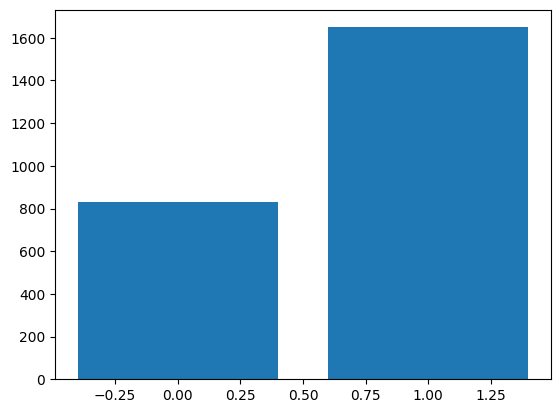

In [93]:
# class weight 필요할 수도
category_counts = train['first_party_winner'].value_counts()
plt.bar(category_counts.index, category_counts.values)
print(category_counts)

In [47]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [70]:
x_train = train
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  2478 non-null   object
 1   first_party         2478 non-null   object
 2   second_party        2478 non-null   object
 3   facts               2478 non-null   object
 4   first_party_winner  2478 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 96.9+ KB


In [71]:
# Define preprocessing functions
def remove_punctuation_and_lower(text):
    # Remove punctuation marks using the string module
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert text to lowercase
    text = text.lower()
    return text

In [72]:
def lemmatize_word(word):
    # Lemmatize the word using WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(word)

In [73]:
# Apply preprocessing steps to the 'facts' column
x_train['preprocessed_facts'] = train['facts'].apply(remove_punctuation_and_lower)
x_train['tokenized_facts'] = train['preprocessed_facts'].apply(word_tokenize)
x_train['lemmatized_facts'] = train['tokenized_facts'].apply(lambda x: [lemmatize_word(word) for word in x])
x_train['lemmatized_facts'] = train['lemmatized_facts'].apply(lambda x: [word for word in x if word not in stopwords.words('english')])

In [74]:
# Concatenate all lemmatized words into a single string
all_words = ' '.join(x_train['lemmatized_facts'].apply(lambda x: ' '.join(x)))

In [75]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

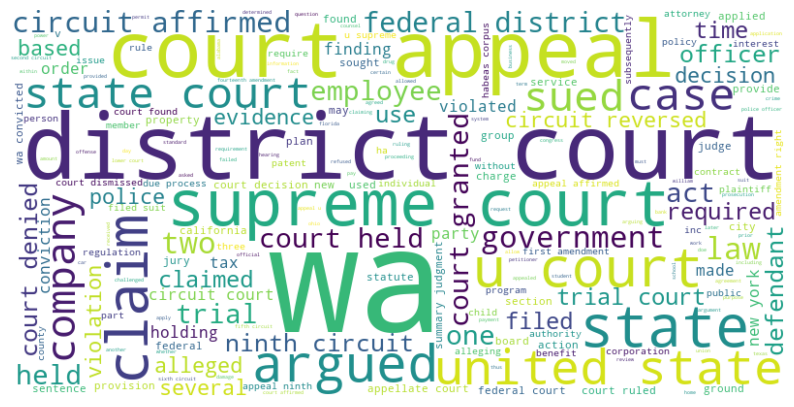

In [76]:
# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

word cloud로는 파악하기 힘들어보임, 특히 주로 court 뒤에 승소의 대한 핵심적인 내용이 나옴. 함부로 제거가 힘듬

In [77]:
word_list = [word for sublist in x_train['lemmatized_facts'] for word in sublist]

In [80]:
#exceppt ' and one letter
word_freq = word_freq[(word_freq.index.str.len() > 1) & (word_freq.index != "'")]

court        8776
wa           5012
district     3168
state        2793
appeal       2757
federal      1886
circuit      1742
act          1588
held         1230
claim        1207
case         1173
supreme      1168
law          1126
trial        1070
affirmed     1037
filed         996
right         964
amendment     901
denied        819
found         804
dtype: int64


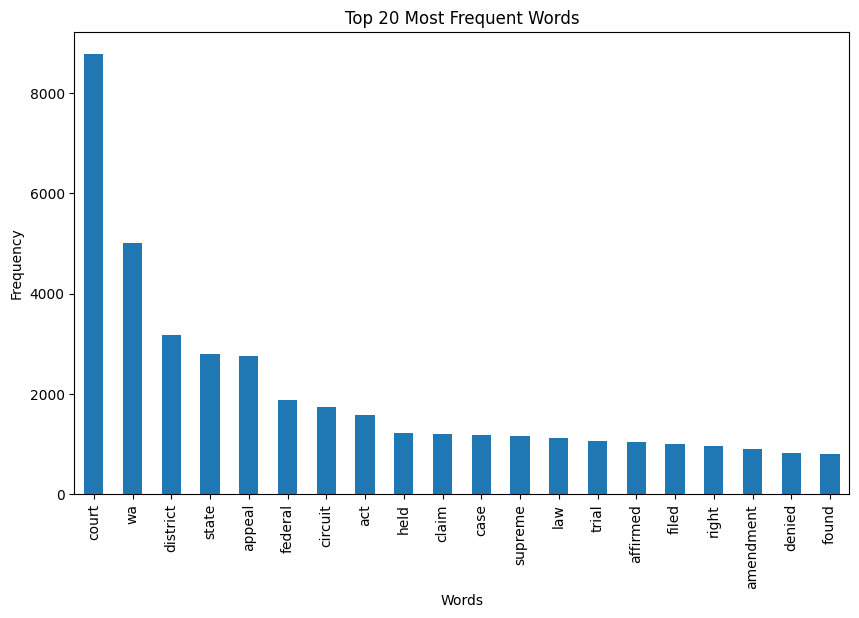

In [81]:
# Select the top N words for visualization
top_n = 20
top_words = word_freq.head(top_n)
print(top_words)
# Plot the bar graph
plt.figure(figsize=(10, 6))
top_words.plot(kind='bar')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.show()

In [82]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  2478 non-null   object
 1   first_party         2478 non-null   object
 2   second_party        2478 non-null   object
 3   facts               2478 non-null   object
 4   first_party_winner  2478 non-null   int64 
 5   preprocessed_facts  2478 non-null   object
 6   tokenized_facts     2478 non-null   object
 7   lemmatized_facts    2478 non-null   object
dtypes: int64(1), object(7)
memory usage: 155.0+ KB


In [83]:
x_train.head()

,ID,first_party,second_party,facts,first_party_winner,preprocessed_facts,tokenized_facts,lemmatized_facts
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1,on june 27 1962 phil st amant a candidate for ...,"[on, june, 27, 1962, phil, st, amant, a, candi...","[june, 27, 1962, phil, st, amant, candidate, p..."
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0,ramon nelson was riding his bike when he suffe...,"[ramon, nelson, was, riding, his, bike, when, ...","[ramon, nelson, wa, riding, bike, suffered, le..."
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1,an alabama state court convicted billy joe mag...,"[an, alabama, state, court, convicted, billy, ...","[alabama, state, court, convicted, billy, joe,..."
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0,victor linkletter was convicted in state court...,"[victor, linkletter, was, convicted, in, state...","[victor, linkletter, wa, convicted, state, cou..."
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1,on april 24 1953 in selma alabama an intruder ...,"[on, april, 24, 1953, in, selma, alabama, an, ...","[april, 24, 1953, selma, alabama, intruder, br..."


    # 1.modeling

In [97]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [98]:
def preprocess_text(text):
    # Remove punctuation marks using the string module
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text into words
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)
    return processed_text

In [107]:
# Preprocess the 'facts' column
train['processed_facts'] = train['facts'].apply(preprocess_text)

X = train['processed_facts']
y = train['first_party_winner']

In [108]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
# Vectorize the preprocessed text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [111]:
model = LogisticRegression()

In [114]:
model.fit(X_train_vectorized, y_train)

LogisticRegression()

In [116]:
y_pred = model.predict(X_test_vectorized)

In [117]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.65


In [118]:
x_test = test['facts'].apply(preprocess_text)
x_test_vectorized = vectorizer.transform(x_test)

In [119]:
pred = model.predict(x_test_vectorized)

In [120]:
sub['first_party_winner'] = pred
sub.head()

,ID,first_party_winner
0,TEST_0000,1
1,TEST_0001,1
2,TEST_0002,1
3,TEST_0003,1
4,TEST_0004,1


In [123]:
sub['first_party_winner'].value_counts()

1    1218
0      22
Name: first_party_winner, dtype: int64

In [124]:
sub.to_csv('sub_log.csv', index = False)

In [130]:
import xgboost as xgb

In [148]:
model = xgb.XGBRegressor()

In [149]:
model.fit(X_train_vectorized, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [150]:
y_pred = model.predict(X_test_vectorized)

In [151]:
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

In [152]:
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.57


In [153]:
pred = model.predict(x_test_vectorized)

In [154]:
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in pred]

In [156]:
sub['first_party_winner'] = y_pred_binary
sub['first_party_winner'].value_counts()

1    932
0    308
Name: first_party_winner, dtype: int64

In [157]:
sub.to_csv('sub_xgb.csv', index = False)

감성분류로 접근
'''
1. first_party 와 second_party도 문장부호 제거, 소문자변환 해야함 , 이름 1개가 2~3개의 단어로 만들지게
2. model 선택
3. 감정분석 - 이름+(긍정적or부정적)단어 = 가중치 부여
(facts를 마침표 단위로 끊고, first_party 또는 second_party가 나오는 문장을 추출
case1) first_party 문장에서 긍정적 단어는 + , 부정적 단어는 _
case2) second_party 문장에서 긍정적 단어는 -, 부정적 단어는 +)
'''
이름으로 문장을 추출하고, 1일 때 first_party 문장 긍정 , second_party 문장 부정
                          0일 때 first_party 문장 부정, second_party 문장 긍정 이걸로 학습?

facts의 이름을 first,second 로 바꾸고 학습시키기?

In [173]:
import pandas as pd
import re
new = train
new['facts'] = new['facts'].str.lower()

# Assuming you have a DataFrame called 'train' with 'first_party' and 'second_party' columns

# Remove punctuation marks, convert to lowercase, and extract names with three or more characters based on spacing
new['first_party'] = train['first_party'].apply(lambda x: re.sub(r'[^\w\s]', '', x).lower())
new['first_party'] = train['first_party'].apply(lambda x: ' '.join(filter(lambda y: len(y) >= 3, x.split())))

new['second_party'] = train['second_party'].apply(lambda x: re.sub(r'[^\w\s]', '', x).lower())
new['second_party'] = train['second_party'].apply(lambda x: ' '.join(filter(lambda y: len(y) >= 3, x.split())))

# Print the updated DataFrame
print(new[['first_party','second_party']])

                                 first_party                 second_party
0                                 phil amant              herman thompson
1                             stephen duncan               lawrence owens
2                          billy joe magwood        tony patterson warden
3                                 linkletter                       walker
4                         william earl fikes                      alabama
...                                      ...                          ...
2473     hollyfrontier cheyenne refining llc  renewable fuels association
2474               grupo mexicano desarrollo       alliance bond fund inc
2475                                 peguero                united states
2476  immigration and naturalization service                          cyr
2477                                 markman     westview instruments inc

[2478 rows x 2 columns]


In [185]:
sentences = []
first_party_sentences = []
second_party_sentences = []
for index, row in train.iterrows():
    first_party_words = set(row['first_party'].split())
    second_party_words = set(row['second_party'].split())
    fact_sentences = row['facts'].split('.')
    
    matching_sentences = []
    matching_first_party_sentences = []
    matching_second_party_sentences = []
    for sentence in fact_sentences:
        sentence_words = set(sentence.split())
        if first_party_words.intersection(sentence_words) or second_party_words.intersection(sentence_words):
            matching_sentences.append(sentence.strip())
        if first_party_words.intersection(sentence_words):
            matching_first_party_sentences.append(sentence.strip())
        if second_party_words.intersection(sentence_words):
            matching_second_party_sentences.append(sentence.strip())
    
    sentences.append(matching_sentences)
    first_party_sentences.append(matching_first_party_sentences)
    second_party_sentences.append(matching_second_party_sentences)

In [235]:
new['extracted_sentences'] = sentences
new['first_party_sentences'] = first_party_sentences
new['second_party_sentences'] = second_party_sentences

In [187]:
new['extracted_sentences'][1]

['after two eyewitnesses identified lawrence owens from an array of photos and then a lineup, he was tried and convicted for nelson’s death',
 'because nelson was carrying cocaine and crack cocaine potentially for distribution, the judge at owens’ bench trial ruled that owens was probably also a drug dealer and was trying to “knock [nelson] off',
 '” owens was found guilty of first-degree murder and sentenced to 25 years in prison',
 'owens filed a petition for a writ of habeas corpus on the grounds that his constitutional right to due process was violated during the trial',
 'the district court denied the writ of habeas corpus, and owens appealed']

In [188]:
new['facts'][1]

'ramon nelson was riding his bike when he suffered a lethal blow to the back of his head with a baseball bat. after two eyewitnesses identified lawrence owens from an array of photos and then a lineup, he was tried and convicted for nelson’s death. because nelson was carrying cocaine and crack cocaine potentially for distribution, the judge at owens’ bench trial ruled that owens was probably also a drug dealer and was trying to “knock [nelson] off.” owens was found guilty of first-degree murder and sentenced to 25 years in prison.\nowens filed a petition for a writ of habeas corpus on the grounds that his constitutional right to due process was violated during the trial. he argued that the eyewitness identification should have been inadmissible based on unreliability and that the judge impermissibly inferred a motive when a motive was not an element of the offense. the district court denied the writ of habeas corpus, and owens appealed. the u.s. court of appeals for the seventh circuit

In [195]:
new[['first_party_winner','first_party_sentences','second_party_sentences']]

,first_party_winner,first_party_sentences,second_party_sentences
0,1,"[on june 27, 1962, phil st, amant accused his ...","[amant implicated herman thompson, an east bat..."
1,0,[],[after two eyewitnesses identified lawrence ow...
2,1,[an alabama state court convicted billy joe ma...,[]
3,0,[victor linkletter was convicted in state cour...,[]
4,1,[the police apprehended william earl fikes on ...,[the supreme court of alabama affirmed]
...,...,...,...
2473,1,[],[congress amended the clean air act through th...
2474,1,"[, an investment fund, purchased approximately...","[alliance bond fund, inc, after gmd fell into ..."
2475,0,[peguero to 274 months of imprisonment after h...,[]
2476,0,[before the effective dates of the antiterrori...,[cyr a waiver]


In [236]:
new.head()

,ID,first_party,second_party,facts,first_party_winner,preprocessed_facts,tokenized_facts,lemmatized_facts,processed_facts,extracted_sentences,first_party_sentences,second_party_sentences
0,TRAIN_0000,phil amant,herman thompson,"on june 27, 1962, phil st. amant, a candidate ...",1,on june 27 1962 phil st amant a candidate for ...,"[on, june, 27, 1962, phil, st, amant, a, candi...","[june, 27, 1962, phil, st, amant, candidate, p...",june 27 1962 phil st amant candidate public of...,"[on june 27, 1962, phil st, amant accused his ...","[on june 27, 1962, phil st, amant accused his ...","[amant implicated herman thompson, an east bat..."
1,TRAIN_0001,stephen duncan,lawrence owens,ramon nelson was riding his bike when he suffe...,0,ramon nelson was riding his bike when he suffe...,"[ramon, nelson, was, riding, his, bike, when, ...","[ramon, nelson, wa, riding, bike, suffered, le...",ramon nelson riding bike suffered lethal blow ...,[after two eyewitnesses identified lawrence ow...,[],[after two eyewitnesses identified lawrence ow...
2,TRAIN_0002,billy joe magwood,tony patterson warden,an alabama state court convicted billy joe mag...,1,an alabama state court convicted billy joe mag...,"[an, alabama, state, court, convicted, billy, ...","[alabama, state, court, convicted, billy, joe,...",alabama state court convicted billy joe magwoo...,[an alabama state court convicted billy joe ma...,[an alabama state court convicted billy joe ma...,[]
3,TRAIN_0003,linkletter,walker,victor linkletter was convicted in state court...,0,victor linkletter was convicted in state court...,"[victor, linkletter, was, convicted, in, state...","[victor, linkletter, wa, convicted, state, cou...",victor linkletter convicted state court eviden...,[victor linkletter was convicted in state cour...,[victor linkletter was convicted in state cour...,[]
4,TRAIN_0004,william earl fikes,alabama,"on april 24, 1953 in selma, alabama, an intrud...",1,on april 24 1953 in selma alabama an intruder ...,"[on, april, 24, 1953, in, selma, alabama, an, ...","[april, 24, 1953, selma, alabama, intruder, br...",april 24 1953 selma alabama intruder broke apa...,[the police apprehended william earl fikes on ...,[the police apprehended william earl fikes on ...,[the supreme court of alabama affirmed]


In [242]:
test = new

In [243]:
# Extract sentences from 'facts' column based on matching words in 'first_party' and 'second_party'
sentences = []
first_party_sentences = []
second_party_sentences = []

for index, row in train.iterrows():
    first_party_words = set(row['first_party'].split())
    second_party_words = set(row['second_party'].split())
    fact_sentences = row['facts'].split('.')
    
    matching_sentences = []
    matching_first_party_sentences = []
    matching_second_party_sentences = []
    
    for sentence in fact_sentences:
        sentence_words = set(sentence.split())
        
        if first_party_words.intersection(sentence_words) or second_party_words.intersection(sentence_words):
            matching_sentences.append(sentence.strip())
        
        if first_party_words.intersection(sentence_words):
            sentence_without_first_party = ' '.join(word for word in sentence.split() if word not in first_party_words)
            matching_first_party_sentences.append(sentence_without_first_party.strip())
        
        if second_party_words.intersection(sentence_words):
            matching_second_party_sentences.append(sentence.strip())
    
    sentences.append(matching_sentences)
    first_party_sentences.append(matching_first_party_sentences)
    second_party_sentences.append(matching_second_party_sentences)

# Add the new columns to the DataFrame
test['matching_sentences'] = sentences
test['matching_first_party_sentences'] = first_party_sentences
test['matching_second_party_sentences'] = second_party_sentences

              ID                             first_party  \
0     TRAIN_0000                              phil amant   
1     TRAIN_0001                          stephen duncan   
2     TRAIN_0002                       billy joe magwood   
3     TRAIN_0003                              linkletter   
4     TRAIN_0004                      william earl fikes   
...          ...                                     ...   
2473  TRAIN_2473     hollyfrontier cheyenne refining llc   
2474  TRAIN_2474               grupo mexicano desarrollo   
2475  TRAIN_2475                                 peguero   
2476  TRAIN_2476  immigration and naturalization service   
2477  TRAIN_2477                                 markman   

                     second_party  \
0                 herman thompson   
1                  lawrence owens   
2           tony patterson warden   
3                          walker   
4                         alabama   
...                           ...   
2473  renewable fuel

facts에서 이름이 담긴 문장들을 뽑아냄, 그 문장들을 다시 first가 속한문장, second이 속한 문장으로 나눔
그 나눈 문장에서 first, second 이름 제거

In [245]:
test.head()

,ID,first_party,second_party,facts,first_party_winner,preprocessed_facts,tokenized_facts,lemmatized_facts,processed_facts,extracted_sentences,first_party_sentences,second_party_sentences,matching_sentences,matching_first_party_sentences,matching_second_party_sentences
0,TRAIN_0000,phil amant,herman thompson,"on june 27, 1962, phil st. amant, a candidate ...",1,on june 27 1962 phil st amant a candidate for ...,"[on, june, 27, 1962, phil, st, amant, a, candi...","[june, 27, 1962, phil, st, amant, candidate, p...",june 27 1962 phil st amant candidate public of...,"[on june 27, 1962, phil st, amant accused his ...","[on june 27, 1962, phil st, amant accused his ...","[amant implicated herman thompson, an east bat...","[on june 27, 1962, phil st, amant accused his ...","[on june 27, 1962, st, accused his political o...","[amant implicated herman thompson, an east bat..."
1,TRAIN_0001,stephen duncan,lawrence owens,ramon nelson was riding his bike when he suffe...,0,ramon nelson was riding his bike when he suffe...,"[ramon, nelson, was, riding, his, bike, when, ...","[ramon, nelson, wa, riding, bike, suffered, le...",ramon nelson riding bike suffered lethal blow ...,[after two eyewitnesses identified lawrence ow...,[],[after two eyewitnesses identified lawrence ow...,[after two eyewitnesses identified lawrence ow...,[],[after two eyewitnesses identified lawrence ow...
2,TRAIN_0002,billy joe magwood,tony patterson warden,an alabama state court convicted billy joe mag...,1,an alabama state court convicted billy joe mag...,"[an, alabama, state, court, convicted, billy, ...","[alabama, state, court, convicted, billy, joe,...",alabama state court convicted billy joe magwoo...,[an alabama state court convicted billy joe ma...,[an alabama state court convicted billy joe ma...,[],[an alabama state court convicted billy joe ma...,[an alabama state court convicted of murder an...,[]
3,TRAIN_0003,linkletter,walker,victor linkletter was convicted in state court...,0,victor linkletter was convicted in state court...,"[victor, linkletter, was, convicted, in, state...","[victor, linkletter, wa, convicted, state, cou...",victor linkletter convicted state court eviden...,[victor linkletter was convicted in state cour...,[victor linkletter was convicted in state cour...,[],[victor linkletter was convicted in state cour...,[victor was convicted in state court on eviden...,[]
4,TRAIN_0004,william earl fikes,alabama,"on april 24, 1953 in selma, alabama, an intrud...",1,on april 24 1953 in selma alabama an intruder ...,"[on, april, 24, 1953, in, selma, alabama, an, ...","[april, 24, 1953, selma, alabama, intruder, br...",april 24 1953 selma alabama intruder broke apa...,[the police apprehended william earl fikes on ...,[the police apprehended william earl fikes on ...,[the supreme court of alabama affirmed],[the police apprehended william earl fikes on ...,[the police apprehended on the basis of a call...,[the supreme court of alabama affirmed]


In [262]:
pos1 = test['matching_first_party_sentences'][test['first_party_winner']==1]

In [255]:
pos2 = test['matching_second_party_sentences'][test['first_party_winner']==0]

In [256]:
neg1 = test['matching_first_party_sentences'][test['first_party_winner']==0]

In [257]:
neg2 = test['matching_second_party_sentences'][test['first_party_winner']==1]

pos , neg 다시 전처리 , 문장부호 제거, Word tokenization, Lemmatization, Stopwords removal , 한 음절이상 이를 바탕으로 dictionary 만들기

DataFrame 형태로 저장, 문장부호, 소문자변환, 원형화(제거 해야 할 수도)

In [20]:
import string

In [21]:
wlem = nltk.WordNetLemmatizer()
def trans(text):
    # Remove punctuation marks using the string module
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert text to lowercase
    text = text.lower()
    # Lemmatization(원형)
    text = wlem.lemmatize(text)
    return text

In [22]:
train['facts'] = train['facts'].apply(trans)

In [161]:
train.head() #et, al, inc  제외 , 3글자 이상만 포함

,ID,first_party,second_party,facts,first_party_winner,preprocessed_facts,tokenized_facts,lemmatized_facts,processed_facts
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1,on june 27 1962 phil st amant a candidate for ...,"[on, june, 27, 1962, phil, st, amant, a, candi...","[june, 27, 1962, phil, st, amant, candidate, p...",june 27 1962 phil st amant candidate public of...
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0,ramon nelson was riding his bike when he suffe...,"[ramon, nelson, was, riding, his, bike, when, ...","[ramon, nelson, wa, riding, bike, suffered, le...",ramon nelson riding bike suffered lethal blow ...
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1,an alabama state court convicted billy joe mag...,"[an, alabama, state, court, convicted, billy, ...","[alabama, state, court, convicted, billy, joe,...",alabama state court convicted billy joe magwoo...
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0,victor linkletter was convicted in state court...,"[victor, linkletter, was, convicted, in, state...","[victor, linkletter, wa, convicted, state, cou...",victor linkletter convicted state court eviden...
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1,on april 24 1953 in selma alabama an intruder ...,"[on, april, 24, 1953, in, selma, alabama, an, ...","[april, 24, 1953, selma, alabama, intruder, br...",april 24 1953 selma alabama intruder broke apa...


In [24]:
train['facts'][1]

'ramon nelson was riding his bike when he suffered a lethal blow to the back of his head with a baseball bat after two eyewitnesses identified lawrence owens from an array of photos and then a lineup he was tried and convicted for nelson’s death because nelson was carrying cocaine and crack cocaine potentially for distribution the judge at owens’ bench trial ruled that owens was probably also a drug dealer and was trying to “knock nelson off” owens was found guilty of firstdegree murder and sentenced to 25 years in prison\nowens filed a petition for a writ of habeas corpus on the grounds that his constitutional right to due process was violated during the trial he argued that the eyewitness identification should have been inadmissible based on unreliability and that the judge impermissibly inferred a motive when a motive was not an element of the offense the district court denied the writ of habeas corpus and owens appealed the us court of appeals for the seventh circuit reversed the d

extract for names, 위에꺼랑 합쳐야됨

In [31]:
def extract_names(text, word):
    # Split the text into sentences using regular expressions
    sentences = re.split(r'(?<=[.!?])\s+', text)
    
    # Iterate over each sentence
    for sentence in sentences:
        # Check if the word is present in the sentence (case-insensitive)
        if re.search(r'\b{}\b'.format(re.escape(word)), sentence, re.IGNORECASE):
            return sentence
    
    # If no sentence contains the word, return None
    return None

In [35]:
# Specify the word you want to search for
target_word = train['first_party'][0]
target_word

'Phil A. St. Amant'

In [33]:
# Apply the function to the 'facts' column of the DataFrame
train['target_sentence'] = train['facts'].apply(lambda x: extract_names(x, target_word))

In [34]:
train['target_sentence']

0       None
1       None
2       None
3       None
4       None
        ... 
2473    None
2474    None
2475    None
2476    None
2477    None
Name: target_sentence, Length: 2478, dtype: object

In [44]:
print(train['first_party'][0]) # 이름들도 전치리 해줘야 함
print(train['second_party'][0],'\n')
print(train['facts'][0])

Phil A. St. Amant
Herman A. Thompson 

On June 27, 1962, Phil St. Amant, a candidate for public office, made a television speech in Baton Rouge, Louisiana.  During this speech, St. Amant accused his political opponent of being a Communist and of being involved in criminal activities with the head of the local Teamsters Union.  Finally, St. Amant implicated Herman Thompson, an East Baton Rouge deputy sheriff, in a scheme to move money between the Teamsters Union and St. Amant’s political opponent. 
Thompson successfully sued St. Amant for defamation.  Louisiana’s First Circuit Court of Appeals reversed, holding that Thompson did not show St. Amant acted with “malice.”  Thompson then appealed to the Supreme Court of Louisiana.  That court held that, although public figures forfeit some of their First Amendment protection from defamation, St. Amant accused Thompson of a crime with utter disregard of whether the remarks were true.  Finally, that court held that the First Amendment protects